In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
import pytz
import matplotlib.dates as mdates


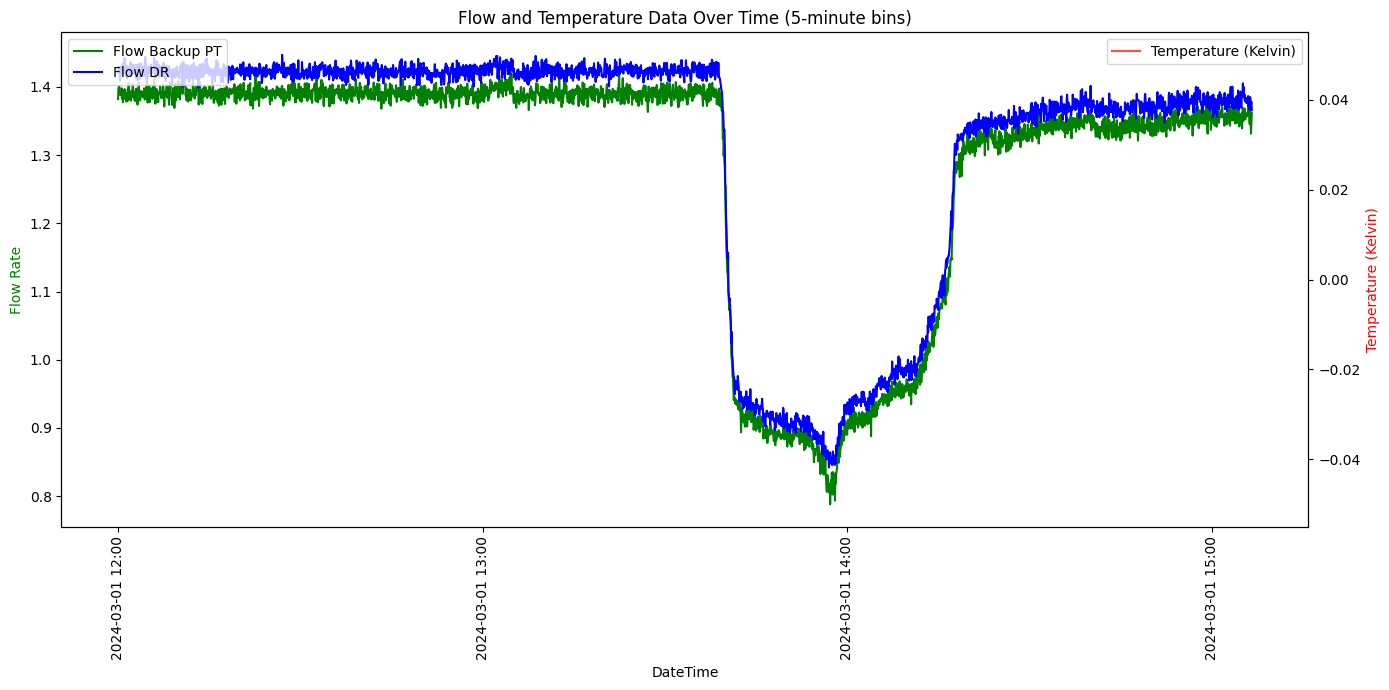

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os

def plot_flow_and_temperature(zip_file_path, temperature_file_path, start_time, end_time):
    # Unzip the flow data
    extraction_folder = zip_file_path.rstrip('.zip')  # Use the zip file name as the base for the extraction folder
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_folder)

    # Read and prepare the flow data
    all_flow_data = pd.DataFrame()
    for file in os.listdir(extraction_folder):
        df = pd.read_csv(os.path.join(extraction_folder, file), skipinitialspace=True)
        all_flow_data = pd.concat([all_flow_data, df], ignore_index=True)

    # Combine Date and Time into datetime, adjust for format
    all_flow_data['DateTime'] = pd.to_datetime(all_flow_data['Date'] + ' ' + all_flow_data['Time'], format='%m/%d/%Y %H:%M:%S.%f')
    all_flow_data.set_index('DateTime', inplace=True)
    flow_data_resampled = all_flow_data[['FlowBackupPT', 'FlowDR']].resample('4S').mean()

    # Read and prepare the temperature data
    temperature_data = pd.read_csv(temperature_file_path)
    start_point_utc = pd.to_datetime('2024-02-16 20:00:00')  # This is your specific start point
    temperature_data['DateTime'] = start_point_utc + pd.to_timedelta(temperature_data['Time (seconds)'], unit='s') - pd.Timedelta(hours=5)
    temperature_data.set_index('DateTime', inplace=True)
    temperature_data_resampled = temperature_data[' Temp (Kelvin)'].resample('1T').mean()

    # Filter data based on the provided start and end time
    flow_data_filtered = flow_data_resampled.loc[start_time:end_time]
    temperature_data_filtered = temperature_data_resampled.loc[start_time:end_time]

    # Plotting both datasets with x-ticks set at every 12 hours within the start and end range
    plt.figure(figsize=(14, 7))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.plot(flow_data_filtered.index, flow_data_filtered['FlowBackupPT'], 'g-', label='Flow Backup PT')
    ax1.plot(flow_data_filtered.index, flow_data_filtered['FlowDR'], 'b-', label='Flow DR')
    ax2.plot(temperature_data_filtered.index, temperature_data_filtered, 'r-', label='Temperature (Kelvin)', alpha=0.7)

    ax1.set_xlabel('DateTime')
    ax1.set_ylabel('Flow Rate', color='g')
    ax2.set_ylabel('Temperature (Kelvin)', color='r')
    plt.title('Flow and Temperature Data Over Time (5-minute bins)')
    # Set x-ticks at 12-hour intervals and format them to include specific times
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))    
    ax1.xaxis.set_tick_params(rotation=90)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Example usage of the function
zip_file_path = 'data/FlowLogs/FlowmeterLogs_240229000001.zip'  # Replace with your actual ZIP file path
temperature_file_path = 'data/ModcamTemps/2024_2_16_20_PT_temps/2024_2_16_20_Backup_PT_temps/2024_2_16_200_4K.txt'  # Replace with your actual temperature file path
start_time = '2024-03-01 12:00:00'  # Specify your desired start time
end_time = '2024-03-01 15:30:00'  # Specify your desired end time
plot_flow_and_temperature(zip_file_path, temperature_file_path, start_time, end_time)


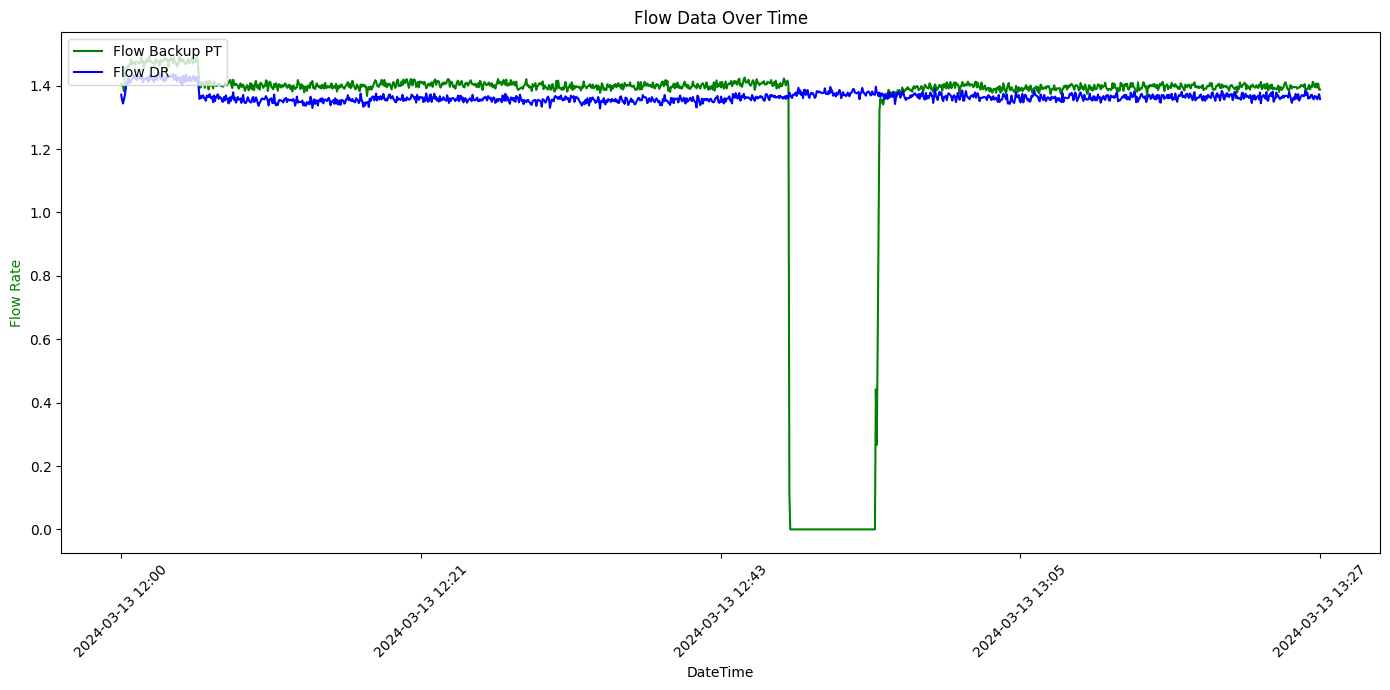

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
import matplotlib.dates as mdates

def plot_flow_data(zip_file_path, start_time, end_time, num_ticks=5):
    # Unzip the flow data
    extraction_folder = zip_file_path.rstrip('.zip')
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_folder)

    # Read and prepare the flow data
    all_flow_data = pd.DataFrame()
    for file in os.listdir(extraction_folder):
        df = pd.read_csv(os.path.join(extraction_folder, file), skipinitialspace=True)
        all_flow_data = pd.concat([all_flow_data, df], ignore_index=True)

    # Combine Date and Time into datetime, adjust for format
    all_flow_data['DateTime'] = pd.to_datetime(all_flow_data['Date'] + ' ' + all_flow_data['Time'], format='%m/%d/%Y %H:%M:%S.%f')
    all_flow_data.set_index('DateTime', inplace=True)
    flow_data_resampled = all_flow_data[['FlowBackupPT', 'FlowDR']].resample('4S').mean()

    # Filter data based on the provided start and end time
    flow_data_filtered = flow_data_resampled.loc[start_time:end_time]

    # Plotting the flow dataset
    plt.figure(figsize=(14, 7))
    ax = plt.gca()
    ax.plot(flow_data_filtered.index, flow_data_filtered['FlowBackupPT'], 'g-', label='Flow Backup PT')
    ax.plot(flow_data_filtered.index, flow_data_filtered['FlowDR'], 'b-', label='Flow DR')

    # Handling the datetime range for x-ticks
    total_range = pd.date_range(start=flow_data_filtered.index.min(), end=flow_data_filtered.index.max(), periods=num_ticks)
    ax.set_xticks(total_range)  # Set the positions for the x-ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Format the x-ticks as dates
    ax.xaxis.set_tick_params(rotation=45)  # Rotate tick labels for better readability

    ax.set_xlabel('DateTime')
    ax.set_ylabel('Flow Rate', color='g')
    plt.title('Flow Data Over Time')
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage of the function
zip_file_path = 'data/FlowLogs/FlowmeterLogs_240229000001.zip'
start_time = '2024-03-13 12:00:00'
end_time = '2024-03-13 15:30:00'
plot_flow_data(zip_file_path, start_time, end_time, num_ticks=5)


In [3]:

# zip_path = 'data/FlowmeterLogs_240216000001.zip'
# extract_to = 'data/extract/'
# df = pd.read_csv('data/2024_2_16_200_4K.txt', header=None)


# df.columns = ['Time (seconds)', 'Res (Ohms)', 'Temp (Kelvin)']

# # Convert string to numeric values for all columns
# df['Time (seconds)'] = pd.to_numeric(df['Time (seconds)'], errors='coerce')
# df['Res (Ohms)'] = pd.to_numeric(df['Res (Ohms)'], errors='coerce')
# df['Temp (Kelvin)'] = pd.to_numeric(df['Temp (Kelvin)'], errors='coerce')
# df = df[1:] # Drop the first row since it's now the header
# start_time = pd.Timestamp('2024-02-16 20:00:00', tz='UTC')
# df['Datetime'] = start_time + pd.to_timedelta(df['Time (seconds)'], unit='s')
# df.set_index('Datetime', inplace=True)

# # Resample and aggregate
# df_resampled = df.resample('15T').mean()


# # Create the target directory if it doesn't exist
# os.makedirs(extract_to, exist_ok=True)

# # Unzip the file
# with ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# # List the files in the extracted directory
# extracted_files = os.listdir(extract_to)
# all_data = pd.DataFrame()



In [4]:

# # Loop through each file, load the data, and concatenate
# for file in extracted_files:
#     file_path = os.path.join(extract_to, file)
#     temp_df = pd.read_csv(file_path)
#     # Combine 'Date' and ' Time' columns and convert to datetime (EST)
#     temp_df['Datetime'] = pd.to_datetime(temp_df['Date'] + temp_df[' Time'])
#     # Convert 'Datetime' from EST to UTC
#     temp_df['Datetime'] = temp_df['Datetime'].dt.tz_localize('EST').dt.tz_convert('UTC')
#     # Append to the all_data DataFrame
#     all_data = pd.concat([all_data, temp_df], ignore_index=True)
# # Resample the data into 15-minute bins, calculating the mean for 'FlowBackupPT'
# all_data_resampled = all_data.set_index('Datetime').resample('15T').mean()

In [5]:
# start_time = pd.Timestamp('2024-02-19 00:00', tz='America/New_York')



# # Convert start_time to UTC timezone
# start_time_utc = start_time.tz_convert('UTC')
# temp_resampled = df_resampled[['Temp (Kelvin)']]

# # Filter data to start at start_time
# all_data_resampled_filtered = all_data_resampled[start_time_utc:]
# temp_resampled_filtered = temp_resampled[start_time_utc:]

# # Ensure the indices are aligned in terms of time zones
# temp_resampled.index = temp_resampled.index.tz_convert('UTC')
# all_data_resampled.index = all_data_resampled.index.tz_convert('UTC')
# fig, ax1 = plt.subplots(figsize=(15, 7))

# color = 'tab:blue'
# ax1.set_xlabel('Datetime (UTC)')
# ax1.set_ylabel('FlowBackupPT', color=color)
# ax1.plot(all_data_resampled_filtered.index, all_data_resampled_filtered[' FlowBackupPT'], color=color, marker='o', linestyle='-', markersize=2, label='Flowmeter BackupPT')
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_xticks(all_data_resampled_filtered.index[::len(all_data_resampled_filtered)//10])
# ax1.set_xticklabels([label.strftime('%Y-%m-%d %H:%M') for label in all_data_resampled_filtered.index[::len(all_data_resampled_filtered)//10]], rotation=45, ha="right")

# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel('Temp (Kelvin)', color=color)
# ax2.plot(temp_resampled_filtered.index, temp_resampled_filtered['Temp (Kelvin)'], color=color, marker='x', linestyle='-', markersize=2, label='4K DR Temp (Kelvin)')
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.title('FlowBackupPT and 4K DR Temp (Kelvin) over Time (15-min bins)')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# plt.show()

In [6]:
# def process_temperature_data(file_path, start_time=None):
#     data_df = pd.read_csv(file_path)
#     start_datetime = pd.Timestamp('2024-02-16 20:00:00', tz='UTC')
#     data_df['datetime'] = start_datetime + pd.to_timedelta(data_df['Time (seconds)'], unit='s')
#     if start_time:
#         data_df = data_df[data_df['datetime'] >= pd.Timestamp(start_time)]
#     data_df.set_index('datetime', inplace=True)
#     data_df.drop(columns=['Time (seconds)'], inplace=True)
#     binned_data = data_df.resample('15T').mean()
#     return binned_data

# def process_flow_data(zip_file_path, start_time=None):
#     extracted_folder_path = zip_file_path.replace('.zip', '') + '_extracted/'
#     with ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extracted_folder_path)

#     flow_data_all = pd.DataFrame()

#     for file in os.listdir(extracted_folder_path):
#         file_path = os.path.join(extracted_folder_path, file)
#         temp_df = pd.read_csv(file_path)
#         temp_df.columns = temp_df.columns.str.strip()  # Clean column names
#         temp_df['datetime'] = pd.to_datetime(temp_df['Date'] + ' ' + temp_df['Time']).dt.tz_localize('US/Eastern', ambiguous='infer').dt.tz_convert('UTC')
#         if start_time:
#             temp_df = temp_df[temp_df['datetime'] >= pd.Timestamp(start_time)]
#         temp_df.drop(columns=['Date', 'Time'], inplace=True)
#         flow_data_all = pd.concat([flow_data_all, temp_df])

#     flow_data_all.set_index('datetime', inplace=True)
#     flow_data_binned = flow_data_all.resample('15T').mean()
#     return flow_data_binned

# def process_air_temperature_data(file_path, start_time=None):
#     air_temp_df = pd.read_csv(file_path)
#     air_temp_df.rename(columns={'Timestamp for sample frequency every 1 min': 'Timestamp'}, inplace=True)
#     air_temp_df['Timestamp'] = pd.to_datetime(air_temp_df['Timestamp']).dt.tz_localize('US/Eastern').dt.tz_convert('UTC')
#     if start_time:
#         air_temp_df = air_temp_df[air_temp_df['Timestamp'] >= pd.Timestamp(start_time)]
#     return air_temp_df

# def plot_data(flow_data, temp_data, air_temp_data):

#     fig, ax1 = plt.subplots(figsize=(15, 8))
#     # FlowBackupPT

#     color = 'tab:red'
#     ax1.set_xlabel('Datetime (UTC)')
#     ax1.set_ylabel('FlowBackupPT', color=color)
#     ax1.plot(flow_data.index, flow_data['FlowBackupPT'], label='FlowBackupPT', color=color)
#     ax1.tick_params(axis='y', labelcolor=color)
#     # Temperature Data

#     ax2 = ax1.twinx()
#     color = 'tab:blue'
#     ax2.set_ylabel('Temperature (Kelvin)', color=color)
#     ax2.plot(temp_data.index, temp_data.iloc[:, -1], label='Temperature Data', color=color, alpha=0.7)
#     ax2.tick_params(axis='y', labelcolor=color)
# #     Utility Hall Temperature Data

# #     ax3 = ax1.twinx()
# #     color = 'tab:green'
# #     ax3.spines['right'].set_position(('outward', 60))
# #     ax3.set_ylabel('Utility Hall Temperature (°F)', color=color)
# #     ax3.plot(air_temp_data['Timestamp'], air_temp_data['Temperature (°F)'], label='Utility Hall Temp', color=color, alpha=0.7)
# #     ax3.tick_params(axis='y', labelcolor=color)
    
    
    
#     # Setting x-ticks to be every 6 hours
#     ax1.xaxis.set_major_locator(mdates.HourLocator(interval=6))
#     ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
#     fig.autofmt_xdate()  # Auto format x-date for better representation
#     fig.tight_layout()
#     plt.title('Flow, Temperature, and Utility Hall Temperature Data (UTC)')
#     plt.show()


# # Example usage
# start_time = '2024-02-17 00:00:00 UTC'
# flow_data = process_flow_data('data/FlowLogs/FlowmeterLogs_240216000001.zip', start_time=start_time)
# temp_data = process_temperature_data('data/ModcamTemps/2024_2_16_20_PT_temps/2024_2_16_20_Backup_PT_temps/2024_2_16_200_4K.txt', start_time=start_time)
# air_temp_data = process_air_temperature_data('data/AirTemps/Utility hall-starts-2024-02-14-10-24-00-ends-2024-02-28-10-24-31.csv', start_time=start_time)

# plot_data(flow_data, temp_data, air_temp_data)


In [7]:
# import pandas as pd
# from zipfile import ZipFile
# import os
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# def process_temperature_data(file_path, start_time=None, timezone='UTC'):
#     data_df = pd.read_csv(file_path)
#     start_datetime = pd.Timestamp('2024-02-16 20:00:00', tz=timezone)
#     data_df['datetime'] = start_datetime + pd.to_timedelta(data_df['Time (seconds)'], unit='s')
#     if start_time:
#         data_df = data_df[data_df['datetime'] >= pd.Timestamp(start_time, tz=timezone)]
#     data_df.set_index('datetime', inplace=True)
#     data_df.drop(columns=['Time (seconds)'], inplace=True)
#     binned_data = data_df.resample('15T').mean()
#     return binned_data.tz_convert('US/Eastern')

# def process_flow_data(zip_file_path, start_time=None):
#     extracted_folder_path = zip_file_path.replace('.zip', '') + '_extracted/'
#     with ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extracted_folder_path)

#     flow_data_all = pd.DataFrame()

#     for file in os.listdir(extracted_folder_path):
#         file_path = os.path.join(extracted_folder_path, file)
#         temp_df = pd.read_csv(file_path)
#         temp_df.columns = temp_df.columns.str.strip()
#         temp_df['datetime'] = pd.to_datetime(temp_df['Date'] + ' ' + temp_df['Time']).dt.tz_localize('US/Eastern')
#         if start_time:
#             temp_df = temp_df[temp_df['datetime'] >= pd.Timestamp(start_time, tz='US/Eastern')]
#         temp_df.drop(columns=['Date', 'Time'], inplace=True)
#         flow_data_all = pd.concat([flow_data_all, temp_df])

#     flow_data_all.set_index('datetime', inplace=True)
#     flow_data_binned = flow_data_all.resample('15T').mean()
#     return flow_data_binned

# def process_air_temperature_data(file_path, start_time=None):
#     air_temp_df = pd.read_csv(file_path)
#     air_temp_df.rename(columns={'Timestamp for sample frequency every 1 min': 'Timestamp'}, inplace=True)
#     air_temp_df['Timestamp'] = pd.to_datetime(air_temp_df['Timestamp']).dt.tz_localize('US/Eastern')
#     if start_time:
#         air_temp_df = air_temp_df[air_temp_df['Timestamp'] >= pd.Timestamp(start_time, tz='US/Eastern')]
#     return air_temp_df

# def plot_data_with_xticks(flow_data, temp_data, air_temp_data):
#     fig, ax1 = plt.subplots(figsize=(15, 8))

#     # Convert index of all DataFrames to 'US/Eastern' for plotting
#     flow_data.index = flow_data.index.tz_convert('US/Eastern')
#     temp_data.index = temp_data.index.tz_convert('US/Eastern')
#     air_temp_data['Timestamp'] = air_temp_data['Timestamp'].dt.tz_convert('US/Eastern')

#     color = 'tab:red'
#     ax1.set_xlabel('Datetime (EST)')
#     ax1.set_ylabel('FlowBackupPT', color=color)
#     ax1.plot(flow_data.index, flow_data['FlowBackupPT'], label='FlowBackupPT', color=color)
#     ax1.tick_params(axis='y', labelcolor=color)

#     ax2 = ax1.twinx()
#     color = 'tab:blue'
#     ax2.set_ylabel('Temperature (Kelvin)', color=color)
#     ax2.plot(temp_data.index, temp_data.iloc[:, -1], label='Temperature Data', color=color, alpha=0.7)
#     ax2.tick_params(axis='y', labelcolor=color)

#     ax3 = ax1.twinx()
#     color = 'tab:green'
#     ax3.spines['right'].set_position(('outward', 60))
#     ax3.set_ylabel('Utility Hall Temperature (°F)', color=color)
#     ax3.plot(air_temp_data['Timestamp'], air_temp_data['Temperature (°F)'], label='Utility Hall Temp', color=color, alpha=0.7)
#     ax3.tick_params(axis='y', labelcolor=color)

#     ax1.xaxis.set_major_locator(mdates.HourLocator(interval=6))
#     ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

#     fig.autofmt_xdate()
#     fig.tight_layout()
#     plt.title('Flow, Temperature, and Utility Hall Temperature Data (EST)')
#     plt.show()


# # Example usage
# start_time = '2024-02-25 00:00:00 EST'
# flow_data = process_flow_data('data/FlowLogs/FlowmeterLogs_240216000001.zip', start_time=start_time)
# temp_data = process_temperature_data('data/ModcamTemps/2024_2_16_20_PT_temps/2024_2_16_20_Backup_PT_temps/2024_2_16_200_4K.txt', start_time=start_time)
# air_temp_data = process_air_temperature_data('data/AirTemps/Utility hall-starts-2024-02-14-10-24-00-ends-2024-02-28-10-24-31.csv', start_time=start_time)

# plot_data_with_xticks(flow_data, temp_data, air_temp_data)


In [8]:
# from zipfile import ZipFile
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# def process_temperature_data(file_path, start_time=None):
#     data_df = pd.read_csv(file_path)
#     start_datetime = pd.Timestamp('2024-02-16 20:00:00')  # Assuming UTC as default
#     data_df['datetime'] = start_datetime + pd.to_timedelta(data_df['Time (seconds)'], unit='s')
#     if start_time:
#         data_df = data_df[data_df['datetime'] >= pd.Timestamp(start_time)]
#     data_df.set_index('datetime', inplace=True)
#     data_df.drop(columns=['Time (seconds)'], inplace=True)
#     binned_data = data_df.resample('15T').mean()
#     return binned_data

# def process_flow_data(zip_file_path, start_time=None):
#     extracted_folder_path = zip_file_path.replace('.zip', '') + '_extracted/'
#     with ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extracted_folder_path)

#     flow_data_all = pd.DataFrame()

#     for file in os.listdir(extracted_folder_path):
#         file_path = os.path.join(extracted_folder_path, file)
#         temp_df = pd.read_csv(file_path)
#         temp_df.columns = temp_df.columns.str.strip()  # Clean column names
#         temp_df['datetime'] = pd.to_datetime(temp_df['Date'] + ' ' + temp_df['Time'])  # Directly in UTC
#         if start_time:
#             temp_df = temp_df[temp_df['datetime'] >= pd.Timestamp(start_time)]
#         temp_df.drop(columns=['Date', 'Time'], inplace=True)
#         flow_data_all = pd.concat([flow_data_all, temp_df])

#     flow_data_all.set_index('datetime', inplace=True)
#     flow_data_binned = flow_data_all.resample('5T').mean()
#     return flow_data_binned

# def process_air_temperature_data(file_path, start_time=None):
#     air_temp_df = pd.read_csv(file_path)
#     air_temp_df.rename(columns={'Timestamp for sample frequency every 1 min': 'Timestamp'}, inplace=True)
#     air_temp_df['Timestamp'] = pd.to_datetime(air_temp_df['Timestamp']) - pd.Timedelta(hours=5)  # Adjust to EST by subtracting 5 hours
#     if start_time:
#         air_temp_df = air_temp_df[air_temp_df['Timestamp'] >= pd.Timestamp(start_time) - pd.Timedelta(hours=5)]
#     return air_temp_df

# def plot_data(flow_data, temp_data, air_temp_data):
#     fig, ax1 = plt.subplots(figsize=(15, 8))

#     color = 'tab:red'
#     ax1.set_xlabel('Datetime (EST)')
#     ax1.set_ylabel('FlowBackupPT', color=color)
#     ax1.plot(flow_data.index, flow_data['FlowBackupPT'], label='FlowBackupPT', color=color)
#     ax1.tick_params(axis='y', labelcolor=color)
    
#     ax2 = ax1.twinx()
#     color = 'tab:blue'
#     ax2.set_ylabel('FlowDR', color=color)
#     ax2.plot(flow_data.index, flow_data['FlowDR'], label='FlowDR', color=color, alpha=0.7)
#     ax2.tick_params(axis='y', labelcolor=color)

#     # Setting x-ticks to be every 4 hours
#     ax1.xaxis.set_major_locator(mdates.HourLocator(interval=4))
#     ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
#     fig.autofmt_xdate()  # Auto format x-date for better representation
#     fig.tight_layout()
#     plt.title('Flow, Temperature, and Utility Hall Temperature Data (EST)')
#     plt.show()
    
# start_time = '2024-02-27 00:00:00'
# flow_data = process_flow_data('data/FlowLogs/FlowmeterLogs_240229000001.zip', start_time=start_time)
# temp_data = process_temperature_data('data/ModcamTemps/2024_2_16_20_PT_temps/2024_2_16_20_Backup_PT_temps/2024_2_16_200_4K.txt', start_time=start_time)
# air_temp_data = process_air_temperature_data('data/AirTemps/Utility hall-starts-2024-02-14-10-24-00-ends-2024-02-28-10-24-31.csv', start_time=start_time)

# plot_data(flow_data, temp_data, air_temp_data)